PART1

In [5]:
library(topicmodels)
library(lda)
library(slam)
library(stm)
library(ggplot2)
library(dplyr)
library(tidytext)
library(furrr) # try to make it faster
plan(multicore)
library(tm) # Framework for text mining
library(tidyverse) # Data preparation and pipes %>%
library(ggplot2) # For plotting word frequencies
library(wordcloud) # Wordclouds!
library(Rtsne)
library(rsvd)
library(geometry)
library(NLP)
library(ldatuning) 

stm v1.3.7 successfully loaded. See ?stm for help. 
 Papers, resources, and other materials at structuraltopicmodel.com


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: future

Loading required package: NLP


Attaching package: 'NLP'


The following object is masked from 'package:ggplot2':

    annotate


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ NLP::annotate() masks ggplot2::annotate()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to 

In [6]:
# Clear up data in global environment
rm(list=ls())

# Load data from csv file
sentiments <- read.csv("sentiments.csv", , check.names = FALSE)

# Check for NAs
cat("\n")
sapply(sentiments, function(x) sum(is.na(x)))

cat("\n")

# Overview of original dataset
str(sentiments)
cat("\n")
sapply(sentiments, typeof)
cat("\n")

Trading app      Source     Comment   Sentiment 
          0           0           0           0


'data.frame':	5642 obs. of  4 variables:
 $ Trading app: chr  "Zerodha Kite" "Zerodha Kite" "Zerodha Kite" "Zerodha Kite" ...
 $ Source     : chr  "Play" "Play" "Play" "Play" ...
 $ Comment    : chr  "From last 2/3 months it's hell of a experience to use kite application. Charts never loads. Just never. Patheti"| __truncated__ "Prices are not real time. There's always a lag of few seconds. Whenever order gets exicuted notification comes "| __truncated__ "Everytime I close the app, the app is logout and I have login and initialize every time. - I have no power savi"| __truncated__ "The latest version is very slow. The charts never load for some stocks. The 3 dots keep on going as per the ani"| __truncated__ ...
 $ Sentiment  : chr  "negative" "negative" "negative" "negative" ...



Trading app      Source     Comment   Sentiment 
"character" "character" "character" "character"

In [7]:
set.seed(830)

# Sample 1000 rows from the original dataframe
sentiments_sample <- sentiments[sample(nrow(sentiments), 1000), ]

# Convert columns to appropriate formats
sentiments_sample$`Trading app` <- as.factor(sentiments_sample$`Trading app`)
sentiments_sample$Source <- as.factor(sentiments_sample$Source)
sentiments_sample$Comment <- as.character(sentiments_sample$Comment)
sentiments_sample$Sentiment <- as.factor(sentiments_sample$Sentiment)

# Double-check the format of each column
sapply(sentiments_sample, typeof)

Trading app      Source     Comment   Sentiment 
  "integer"   "integer" "character"   "integer"

In [8]:
# * default parameters
processed <- textProcessor(
  documents = sentiments_sample$Comment, # textual data
  metadata = sentiments_sample,          # Metadata (other columns)
  lowercase = TRUE,                      # Convert text to lowercase
  removestopwords = TRUE,                # Remove stopwords
  removenumbers = TRUE,                  # Remove numbers from the text
  removepunctuation = TRUE,              # Remove punctuation from the text
  stem = TRUE,                           # Apply stemming
  wordLengths = c(3, Inf),
  sparselevel = 1,           # Sparse level for removing rarely occurring words
  language = "en",                       # Language for stopwords
  verbose = TRUE,
  onlycharacter = TRUE,                  # Keep only alphabetic characters
  striphtml = FALSE,                     # Don't remove HTML tags
  customstopwords = NULL,                # No additional custom stopwords
  v1 = FALSE                       # Use newer version of textProcessor function
)

# Filter out terms that don’t appear in more than 10 documents
out <- prepDocuments(processed$documents, processed$vocab, processed$meta, lower.thresh = 10)

docs <- out$documents
vocab <- out$vocab
meta <- out$meta

# Check levels of the factors in your metadata
cat("\n")
cat(levels(meta$`Trading app`))
cat("\n")
cat(levels(meta$Source))
cat("\n")

Building corpus... 
Converting to Lower Case... 
Removing punctuation... 
Removing stopwords... 
Removing numbers... 
Stemming... 
Creating Output... 
Removing 2112 of 2548 terms (5073 of 21397 tokens) due to frequency 
Your corpus now has 1000 documents, 436 terms and 16324 tokens.
Angel Broking Dhani Stocks Groww HDFC Securities Motilal Oswal Nuvama Paytm Money Sharekhan Upstox Zerodha Kite
Play Reddit


Beginning Spectral Initialization 
	 Calculating the gram matrix...
	 Finding anchor words...
 	...............
	 Recovering initialization...
 	....
Initialization complete.
....................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 1 (approx. per word bound = -5.595) 
....................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 2 (approx. per word bound = -5.417, relative change = 3.178e-02) 
....................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 3 (approx. per word bound = -5.352, relative change = 1.208e-02) 
....................................................................................................
Completed E-Step (0 seconds). 
Complete

   user  system elapsed 
   0.87    0.05    1.82 


Topic 1 Top Words:
 	 Highest Prob: custom, issu, one, team, support, angel, differ 
 	 FREX: angel, custom, got, differ, support, mutual, solut 
 	 Lift: solut, angel, purchas, got, differ, mutual, way 
 	 Score: solut, custom, support, got, angel, team, mutual 
Topic 2 Top Words:
 	 Highest Prob: trade, easi, app, trader, excel, featur, recommend 
 	 FREX: excel, trader, recommend, function, easi, design, impress 
 	 Lift: impress, free, excel, function, perfect, design, recommend 
 	 Score: impress, easi, trade, excel, trader, design, tool 
Topic 3 Top Words:
 	 Highest Prob: app, old, better, version, previous, one, new 
 	 FREX: old, previous, better, far, version, hdfc, new 
 	 Lift: far, previous, old, hdfc, pay, better, given 
 	 Score: far, old, previous, version, better, hdfc, new 
Topic 4 Top Words:
 	 Highest Prob: good, app, need, sell, buy, experi, stock 
 	 FREX: good, sell, buy, navig, detail, technic, groww 
 	 Lift: navig, good, smooth, otherwis, detail, less, sell 


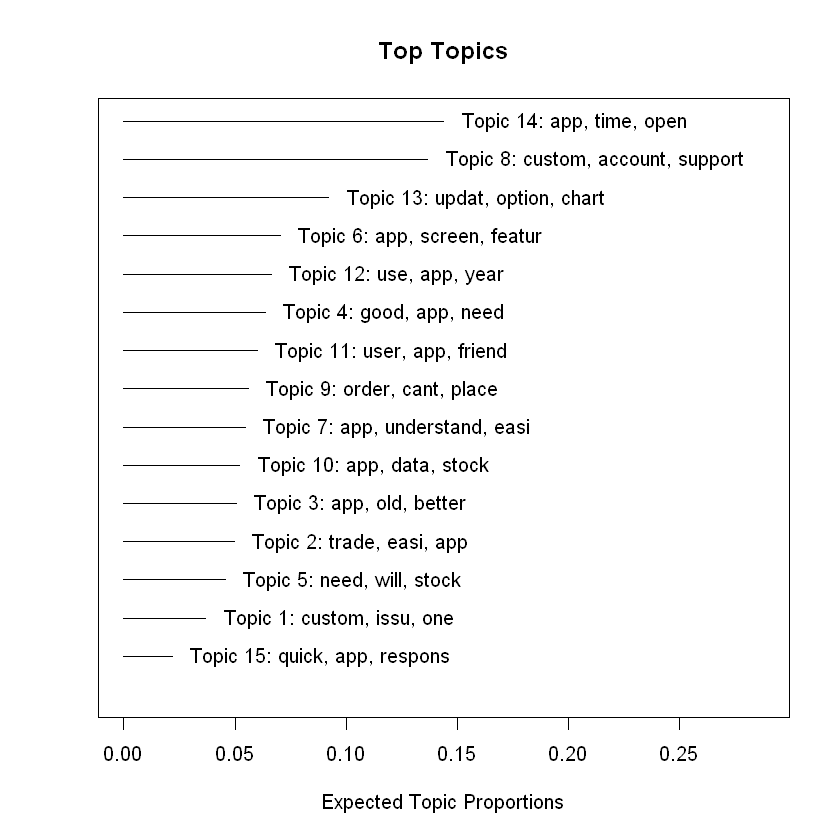

In [9]:
# Set seed for reproducibility
set.seed(831)

# Fit the STM model
system.time({
  First_STM <- stm(
    docs, vocab, 15,                          # Use 15 topics
    prevalence =~ `Trading app` + Sentiment,  # Replace 'publisher' with 'Trading App' and 'date' with 'Sentiment' or another continuous variable
    data = meta,                              # Use the metadata
    seed = 15,                                # Seed for STM model
    max.em.its = 5                            # Limit to 5 EM iterations (adjust as necessary)
  )
})

# Plot the first topic model
plot(First_STM)
cat("\n")

labels <- labelTopics(First_STM)
print(labels)
cat("\n")

   user  system elapsed 
   3.47    0.06    8.33 


Topic 1 Top Words:
 	 Highest Prob: one, fund, issu, team, support, custom, mutual 
 	 FREX: fund, angel, mutual, team, pathet, support, payment 
 	 Lift: solut, payment, fail, angel, fund, mutual, repli 
 	 Score: solut, support, mutual, fund, angel, custom, repli 
Topic 2 Top Words:
 	 Highest Prob: app, trade, trader, excel, dhan, recommend, featur 
 	 FREX: trader, excel, recommend, dhan, design, impress, tool 
 	 Lift: impress, trader, free, excel, recommend, design, tool 
 	 Score: impress, trader, dhan, excel, design, recommend, tool 
Topic 3 Top Words:
 	 Highest Prob: app, version, new, old, updat, better, previous 
 	 FREX: version, old, previous, new, far, hdfc, better 
 	 Lift: far, previous, version, old, hdfc, upgrad, sort 
 	 Score: far, version, old, new, previous, hdfc, better 
Topic 4 Top Words:
 	 Highest Prob: good, stock, sell, buy, time, market, detail 
 	 FREX: good, sell, stock, buy, detail, navig, groww 
 	 Lift: navig, good, sell, stock, buy, brokerag, detail

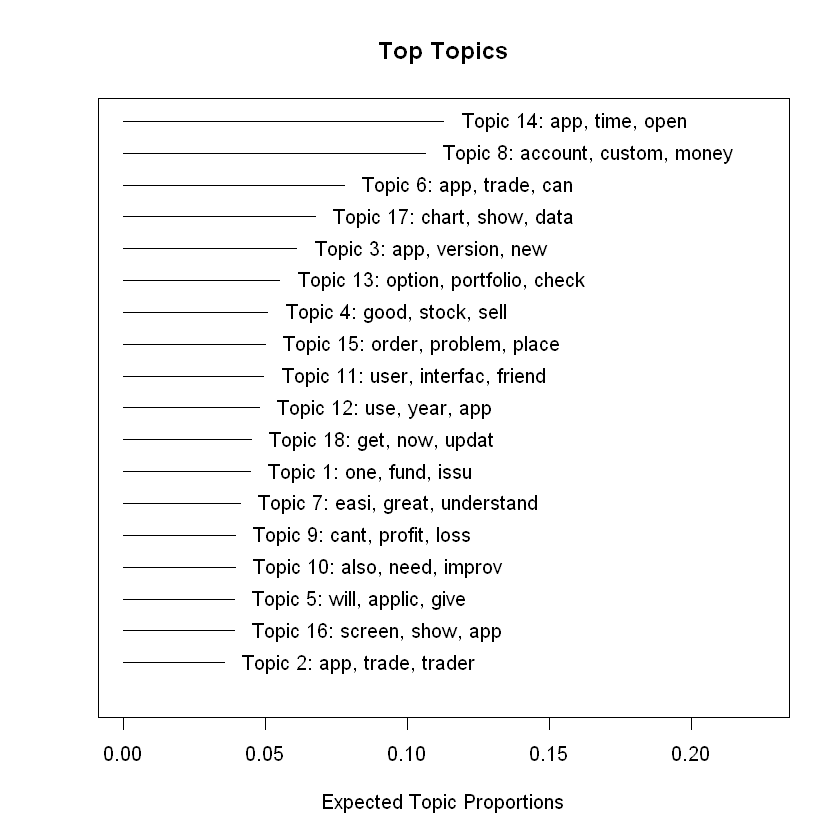

In [10]:
# Set seed for reproducibility
set.seed(832)

# Fit the STM model
system.time({
  Second_STM <- stm(
    documents = out$documents,
    vocab = out$vocab,
    K = 18,  # Number of topics
    prevalence =~ `Trading app` + Sentiment,  # Adjust if necessary
    max.em.its = 75,
    data = out$meta,
    init.type = "Spectral",
    verbose = FALSE
  )
})

# Plot the second topic model
plot(Second_STM)
cat("\n")

labels <- labelTopics(Second_STM)
print(labels)
cat("\n")

   user  system elapsed 
  35.00    0.88  214.75 

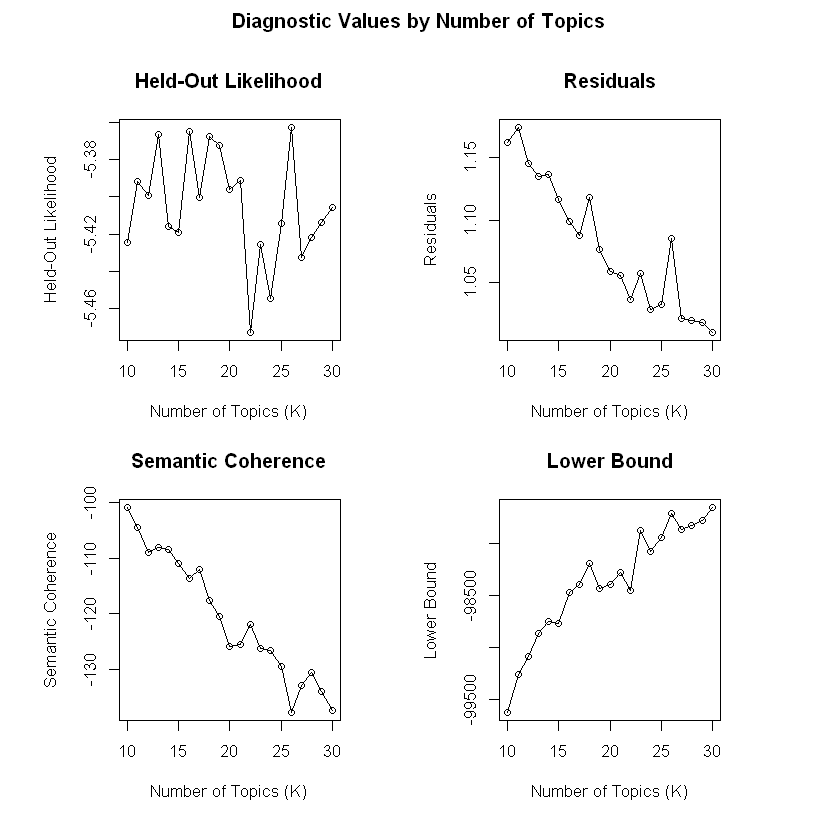

In [11]:
# Set seed for reproducibility
set.seed(833)

# Perform the search for optimal number of topics from 10 to 30
system.time({
  findingk <- searchK(
    out$documents,
    out$vocab,
    K = 10:30,
    prevalence =~ `Trading app` + Sentiment,  # Adjust based on your metadata
    data = out$meta,
    verbose = FALSE
  )
})

# Plot the results
# Held-out likelihood plot
plot(findingk, type = "heldout", main = "Held-out Likelihood vs Number of Topics")

# Residuals plot
plot(findingk, type = "residuals", main = "Residuals vs Number of Topics")

# Semantic coherence plot
plot(findingk, type = "semcoh", main = "Semantic Coherence vs Number of Topics")

# Lower bound plot
plot(findingk, type = "bound", main = "Lower Bound vs Number of Topics")


Beginning Spectral Initialization 
	 Calculating the gram matrix...
	 Finding anchor words...
 	..........
	 Recovering initialization...
 	....
Initialization complete.
....................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 1 (approx. per word bound = -5.634) 
....................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 2 (approx. per word bound = -5.487, relative change = 2.606e-02) 
....................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 3 (approx. per word bound = -5.403, relative change = 1.518e-02) 
....................................................................................................
Completed E-Step (0 seconds). 
Completed M-S

   user  system elapsed 
 146.20    3.64  461.08 

png 
  2

png 
  2

png 
  2

png 
  2

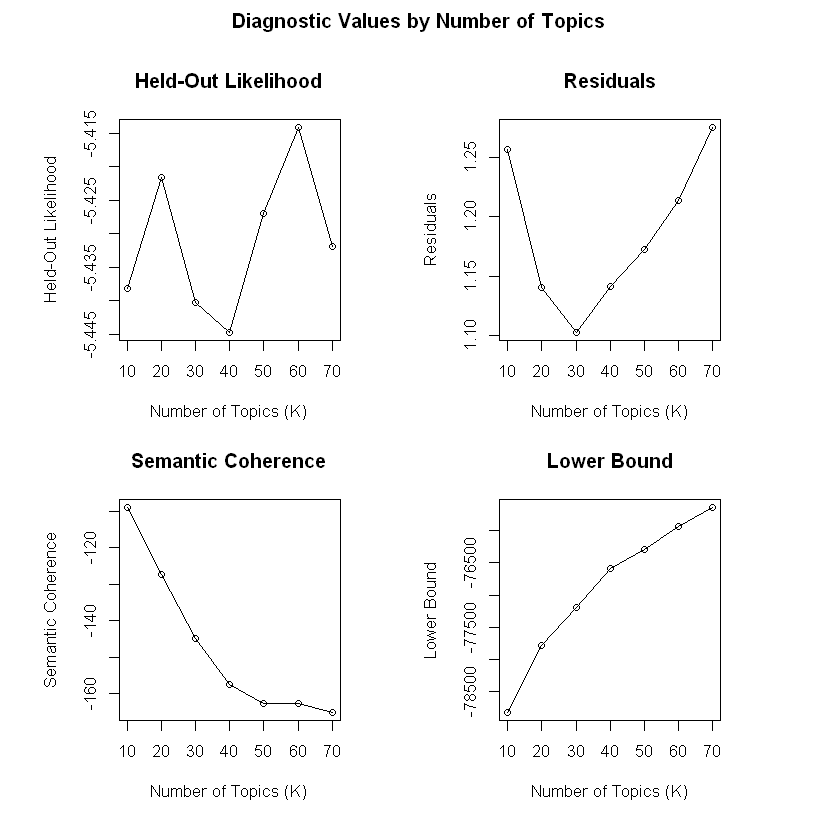

In [12]:
# Set seed for reproducibility
set.seed(834)

# Perform the search for optimal number of topics using the specified K values
system.time({
    findingk_ver2 <- searchK(
        documents = out$documents, 
        vocab = out$vocab,
        K = c(10, 20, 30, 40, 50, 60, 70),  # Specify K values to try
        N = 500,  # Number of documents for held-out likelihood calculation
        proportion = 0.5,  # Proportion of documents used for training vs testing
        heldout.seed = 1234,  # Seed for reproducibility of held-out data
        M = 10,  # Number of times to sample the data for stability
        cores = 1,  # Use 1 core; increase if you want parallelization
        prevalence =~ `Trading app` + `Source` + `Sentiment`,  # Update prevalence formula
        max.em.its = 75,  # Maximum EM iterations
        data = out$meta,  # Metadata associated with the documents
        init.type = "Spectral",  # Initialization method
        verbose = TRUE  # Display progress
    )
})

# Plotting the results
# Overall plot for searchK
plot(findingk_ver2)

# Individual diagnostic plots
# Held-out likelihood plot
png("heldout_likelihood_ver2.png")
plot(findingk_ver2, type = "heldout", main = "Held-out Likelihood vs Number of Topics")
dev.off()

# Residuals plot
png("residuals_ver2.png")
plot(findingk_ver2, type = "residuals", main = "Residuals vs Number of Topics")
dev.off()

# Semantic coherence plot
png("semantic_coherence_ver2.png")
plot(findingk_ver2, type = "semcoh", main = "Semantic Coherence vs Number of Topics")
dev.off()

# Lower bound plot
png("lower_bound_ver2.png")
plot(findingk_ver2, type = "bound", main = "Lower Bound vs Number of Topics")
dev.off()


Beginning Spectral Initialization 
	 Calculating the gram matrix...
	 Finding anchor words...
 		 Initializing tSNE with PCA...
 		 Using tSNE to project to a low-dimensional space...
 		 Calculating exact convex hull...
 	
	 Recovering initialization...
 	....
Initialization complete.
....................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 1 (approx. per word bound = -5.497) 
....................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 2 (approx. per word bound = -5.345, relative change = 2.755e-02) 
....................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 3 (approx. per word bound = -5.284, relative change = 1.146e-02) 
............................

   user  system elapsed 
   3.40    0.09   34.95 

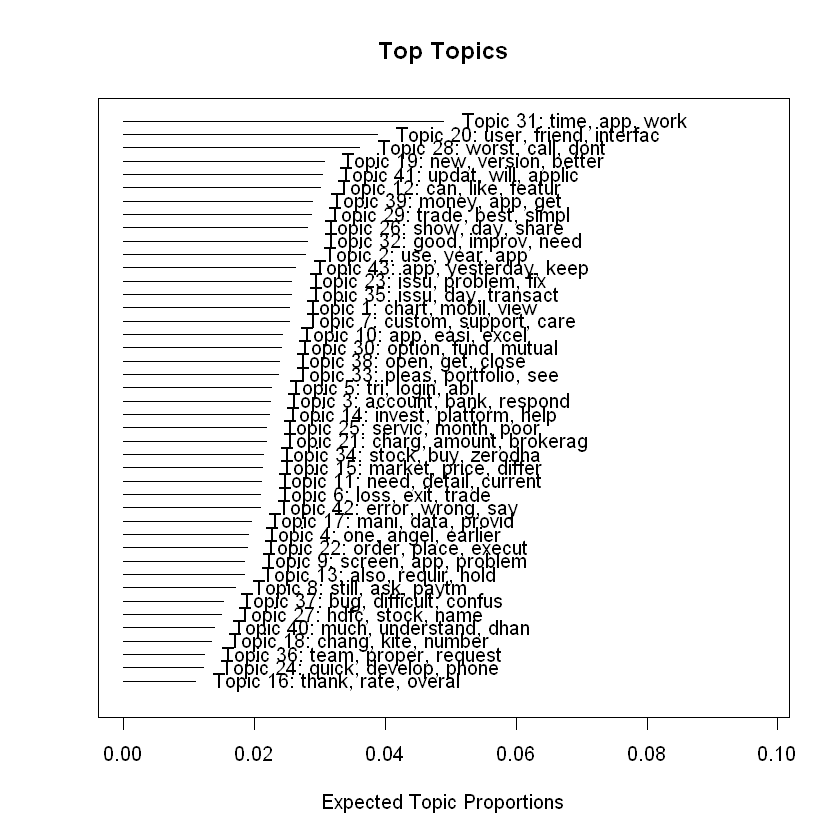

In [13]:
# Set seed for reproducibility
set.seed(835)

# Perform STM with Lee-Mimno method (K=0)
system.time({
    findingk_ver3_lee_mimno <- stm(
        documents = out$documents, 
        vocab = out$vocab,
        K = 0,  # K=0 instructs STM to run Lee-Mimno nonparametric topic modeling
        seed = 1234,  # Randomness now, seed matters for reproducibility
        prevalence =~ `Trading app` + `Sentiment`,  # Update prevalence formula based on your schema
        max.em.its = 75,  # Maximum EM iterations
        data = out$meta,  # Metadata associated with the documents
        init.type = "Spectral",  # Initialization method
        verbose = TRUE  # Display progress
    )
})

# Plotting the results of Lee-Mimno STM
plot(findingk_ver3_lee_mimno)


   user  system elapsed 
   0.34    0.00    5.39 

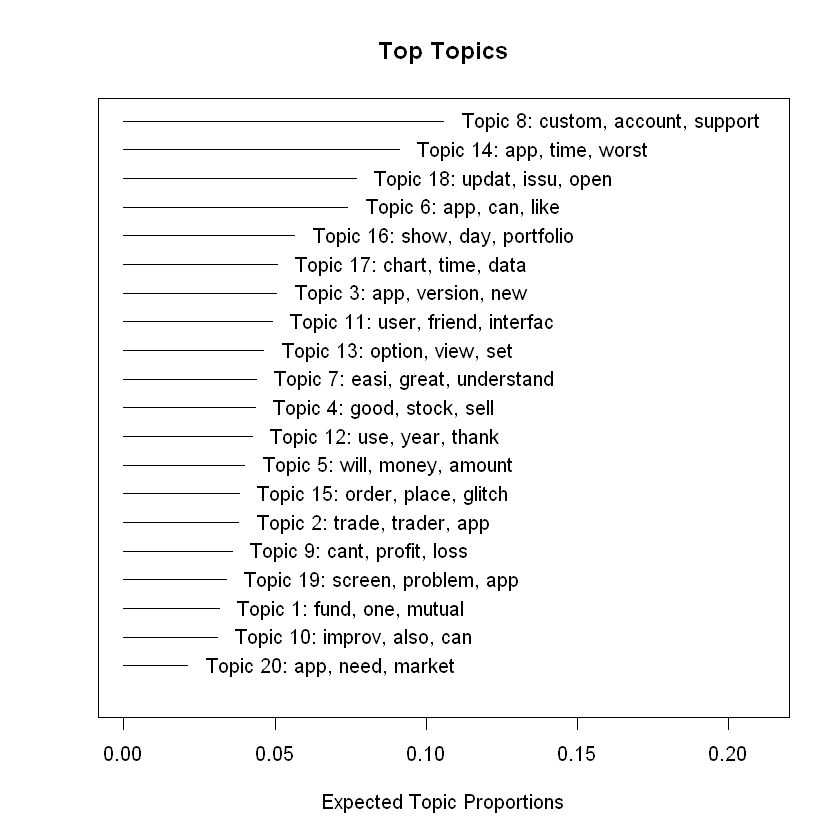

In [14]:
# Run final topic model with 20 topics
set.seed(836)
system.time({
    Third_STM <- stm(
        documents = out$documents, 
        vocab = out$vocab,
        K = 20,  # Set number of topics to 20
        prevalence =~ `Trading app` + `Sentiment`,  # Update prevalence formula based on your schema
        max.em.its = 75,  # Maximum EM iterations
        data = out$meta,  # Metadata associated with the documents
        init.type = "Spectral",  # Initialization method
        verbose = FALSE  # Suppress verbose output
    )
})

# Plot the final topic model
plot(Third_STM)

PART2

In [15]:
# Top Words
labelTopics(Third_STM)

Topic 1 Top Words:
 	 Highest Prob: fund, one, mutual, angel, transact, support, payment 
 	 FREX: fund, mutual, angel, payment, transact, fail, one 
 	 Lift: solut, mutual, fund, fail, payment, angel, transact 
 	 Score: solut, fund, mutual, angel, payment, fail, support 
Topic 2 Top Words:
 	 Highest Prob: trade, trader, app, featur, dhan, excel, recommend 
 	 FREX: trader, recommend, excel, dhan, tool, impress, trade 
 	 Lift: impress, free, tool, recommend, trader, excel, dhan 
 	 Score: impress, dhan, trader, excel, trade, tool, recommend 
Topic 3 Top Words:
 	 Highest Prob: app, version, new, old, better, previous, pleas 
 	 FREX: old, version, previous, far, new, hdfc, better 
 	 Lift: far, old, previous, hdfc, version, sort, new 
 	 Score: far, version, old, previous, new, hdfc, better 
Topic 4 Top Words:
 	 Highest Prob: good, stock, sell, buy, experi, charg, technic 
 	 FREX: good, sell, stock, buy, navig, overal, groww 
 	 Lift: navig, good, sell, stock, buy, overal, specif 

In [16]:
# We can find the top documents associated with a topic with the findThoughts function:
# top 2 paragraps for Topic 1 to 10

findThoughts(
    Third_STM,                          # The fitted STM model
    texts = sentiments_sample$Comment,  # Text data to use for finding relevant documents
    n = 2,                              # Number of top documents to return for each topic
    topics = 1:10                       # Topics to inspect (1 to 10)
)



 Topic 1: 
 	 I have closed the intraday deal at a different price and in the contract note the reflected price is different. Pathetic reply from the Angel one support. They are just sending me the contract note again and again and not looking into the issue.

 	Mutual fund interface sucks.. Amount is not shown by time. According to SEBI, when you buy a mutual fund at the price till 2 o'clock, the amount is shown the next day morning after 10 am. Why it's take too much time other platforms are better then Angel one interm of mutual fund...
 
 Topic 2: 
 	 The Dhan app offers excellent functionality for both novice and experienced traders. @

 	'Dhan is a game changer! its intutive design and real time data make tradinh seamless and efficient.Highli recommended@
 
 Topic 3: 
 	 Pathetic app, old HDFC app is far better than this. Don't close old app.

 	If this app is going to replace the old one, please send a mail to the effect with a dateline. Please ensure not to disturb the usage o

In [17]:

# We can look at multiple, or all, topics this way as well. 
# For this we’ll just look at the shorttext.
# top 3 paragraps for Topic #1 to 15

findThoughts(
    Third_STM,                          # The fitted STM model
    texts = sentiments_sample$Comment,  # Text data to use for finding relevant documents
    n = 3,                              # Number of top documents to return for each topic
    topics = 1:15                       # Topics to inspect (1 to 10)
)




 Topic 1: 
 	 I have closed the intraday deal at a different price and in the contract note the reflected price is different. Pathetic reply from the Angel one support. They are just sending me the contract note again and again and not looking into the issue.

 	Mutual fund interface sucks.. Amount is not shown by time. According to SEBI, when you buy a mutual fund at the price till 2 o'clock, the amount is shown the next day morning after 10 am. Why it's take too much time other platforms are better then Angel one interm of mutual fund...

 	I am really irritated with the customar care feedback.. i had made investment in two different mutual fund for which my account got debited and then rejected reason being payment failed with amc And plus this has happened twice and still no further solution and i havent got my refund for the matter occured very poor app had anticipated it to be way better..all i get is same copy paste feedback through chat..and not even a call back from their end

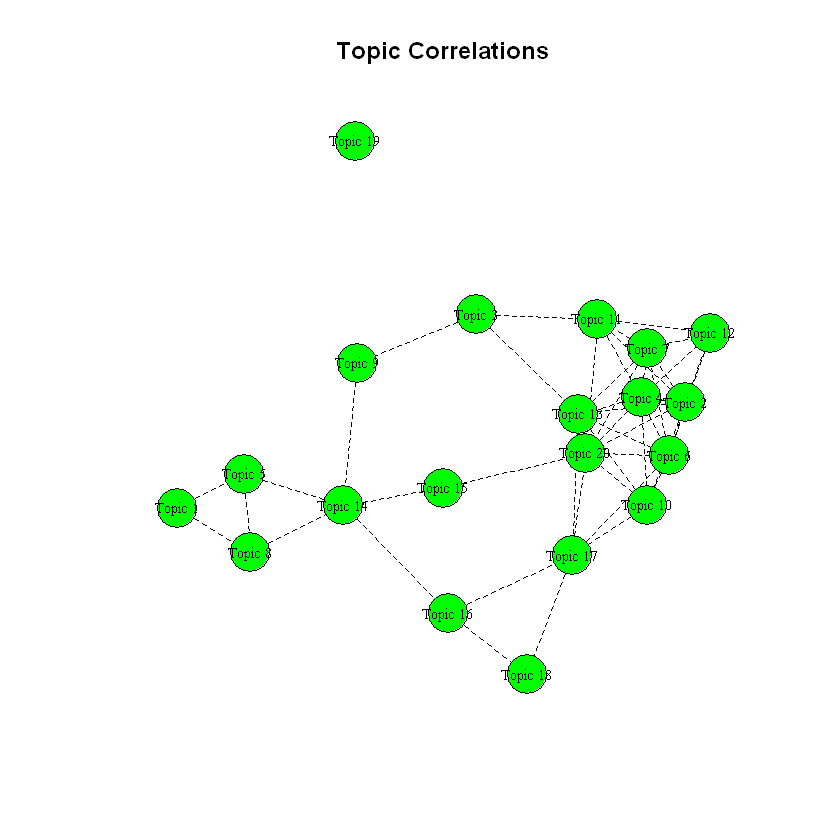

In [18]:

# Graphical display of topic correlations

topic_correlation <- topicCorr(Third_STM)

# Plot the correlations between topics
plot(topic_correlation, main = "Topic Correlations")


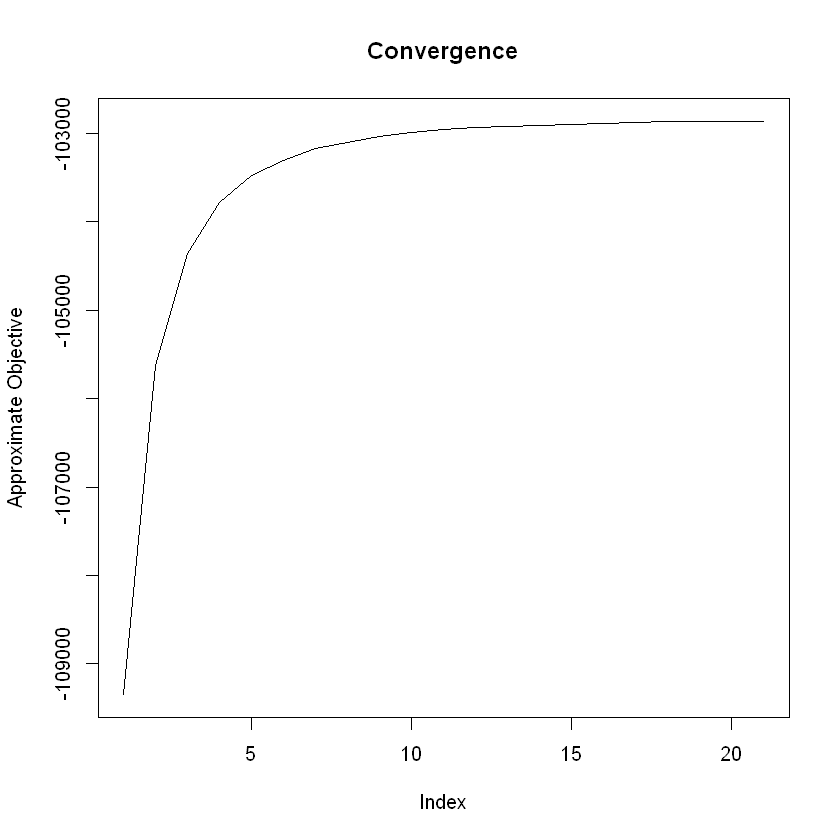

In [19]:
# Graphical display of convergence

plot(
    Third_STM$convergence$bound, # Access the bound from the convergence data
    type = "l",                  # Type of plot: "l" for line plot
    ylab = "Approximate Objective", # Y-axis label
    main = "Convergence"         # Plot title
)


Warning message in wordcloud::wordcloud(words = vocab, freq = vec, max.words = max.words, :
"chart could not be fit on page. It will not be plotted."
Warning message in wordcloud::wordcloud(words = vocab, freq = vec, max.words = max.words, :
"connect could not be fit on page. It will not be plotted."
Warning message in wordcloud::wordcloud(words = vocab, freq = vec, max.words = max.words, :
"work could not be fit on page. It will not be plotted."
Warning message in wordcloud::wordcloud(words = vocab, freq = vec, max.words = max.words, :
"disappoint could not be fit on page. It will not be plotted."
Warning message in wordcloud::wordcloud(words = vocab, freq = vec, max.words = max.words, :
"differ could not be fit on page. It will not be plotted."
Warning message in wordcloud::wordcloud(words = vocab, freq = vec, max.words = max.words, :
"date could not be fit on page. It will not be plotted."
Warning message in wordcloud::wordcloud(words = vocab, freq = vec, max.words = max.words, :
"w

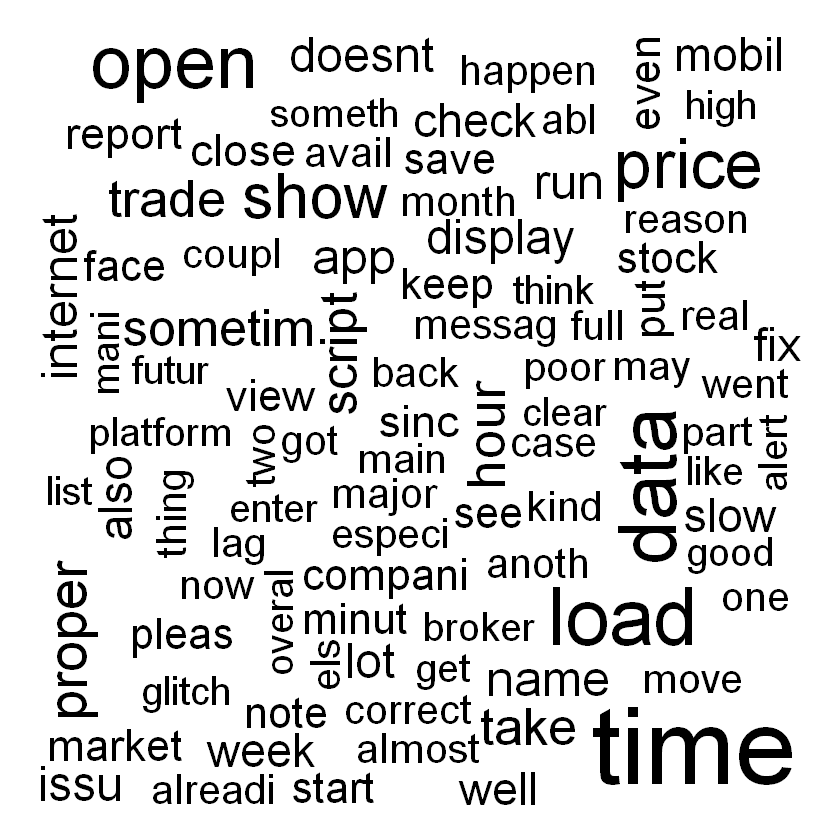

In [20]:
# Wordcloud:topic 17 with word distribution

if (!requireNamespace("wordcloud", quietly = TRUE)) {
  install.packages("wordcloud")
}
library(wordcloud)

# Set seed for reproducibility
set.seed(837)

# Generate a word cloud for topic 17 with specific scaling
cloud(
  Third_STM,        # The STM model
  topic = 17,       # Specify the topic number
  scale = c(10, 2)  # Scale for word frequencies
)


In [21]:
# Check column names in metadata
colnames(out$meta)


[1] "Trading app" "Source"      "Comment"     "Sentiment"

In [22]:
# Check if Sentiment is a factor (categorical)
str(out$meta$Sentiment)

# Estimate effect treating Sentiment as a categorical variable
set.seed(837)
predict_topics <- estimateEffect(
  formula = 1:10 ~ `Trading app` + Sentiment,  # Treat Sentiment as a factor
  stmobj = Third_STM,
  metadata = out$meta,
  uncertainty = "Global",
  prior = 1e-5
)



 Factor w/ 3 levels "negative","neutral",..: 1 1 3 1 1 1 1 3 3 3 ...


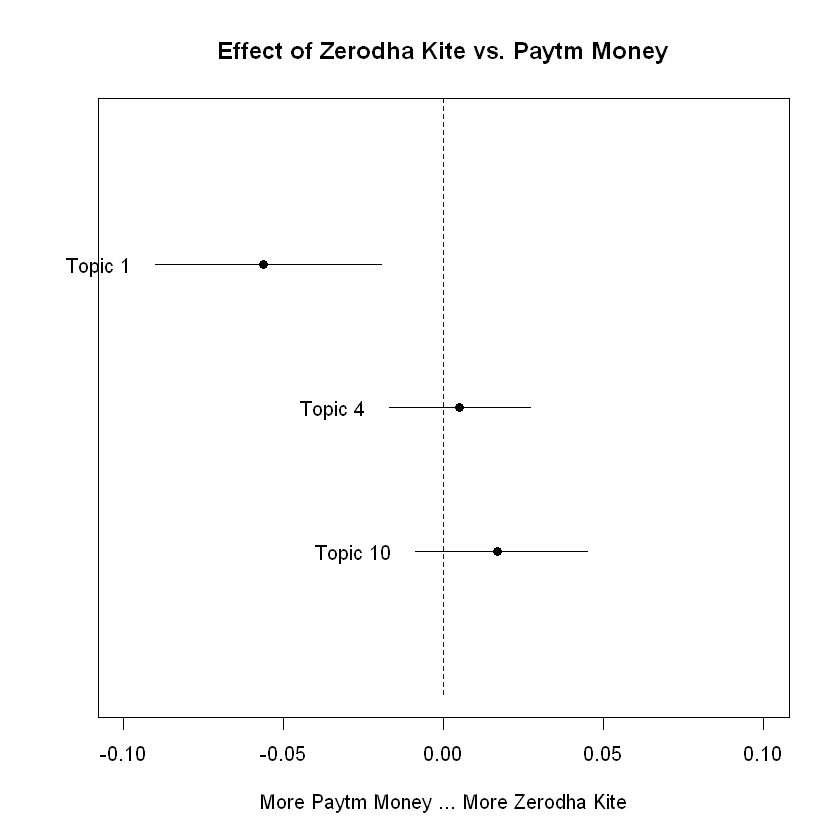

In [23]:
set.seed(837)

# Effect of 'Zerodha Kite' vs. 'Paytm Money' Apps
plot(predict_topics, covariate = "Trading app", topics = c(1, 4, 10),
     model = Third_STM, method = "difference",
     cov.value1 = "Zerodha Kite", cov.value2 = "Paytm Money",  # Replace with valid values from "Trading app"
     xlab = "More Paytm Money ... More Zerodha Kite",  # Update based on selected covariates
     main = "Effect of Zerodha Kite vs. Paytm Money",
     xlim = c(-.1, .1), labeltype = "custom",
     custom.labels = c('Topic 1', 'Topic 4', 'Topic 10'))


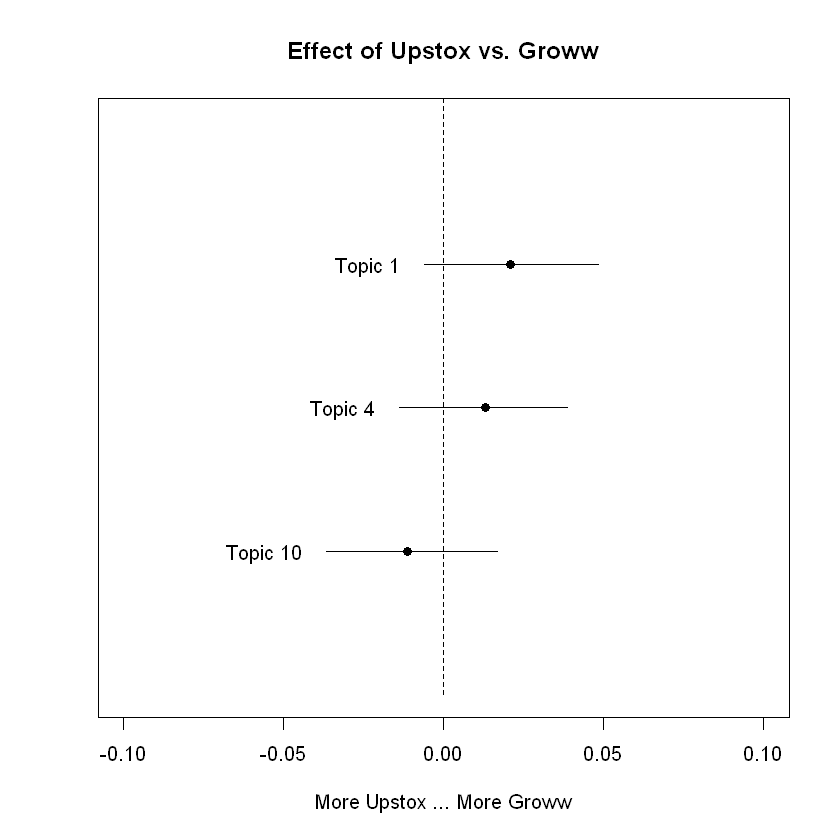

In [24]:

# Effect of 'Groww' vs. 'Investopedia' publishers

plot(predict_topics, covariate = "Trading app", topics = c(1, 4, 10),
     model = Third_STM, method = "difference",
     cov.value1 = "Groww", cov.value2 = "Upstox",  # Replace with valid values from "Trading app"
     xlab = "More Upstox ... More Groww",  # Update based on selected covariates
     main = "Effect of Upstox vs. Groww",
     xlim = c(-.1, .1), labeltype = "custom",
     custom.labels = c('Topic 1', 'Topic 4', 'Topic 10'))

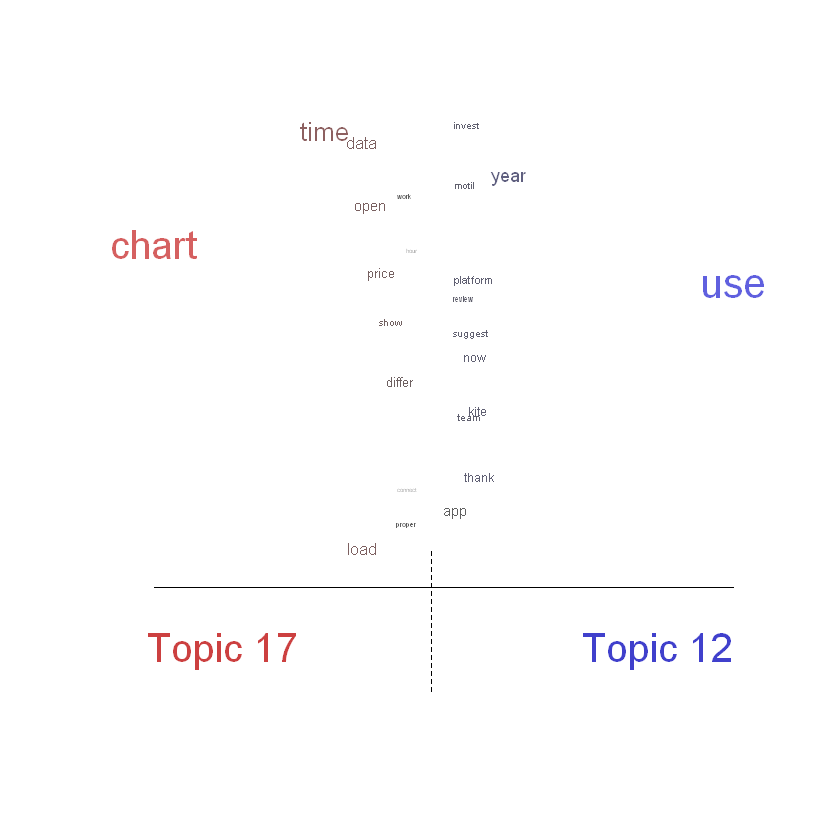

In [25]:
set.seed(831)
plot(Third_STM, 
     type="perspectives", 
     topics=c(17,12), 
     plabels = c("Topic 17","Topic 12"))

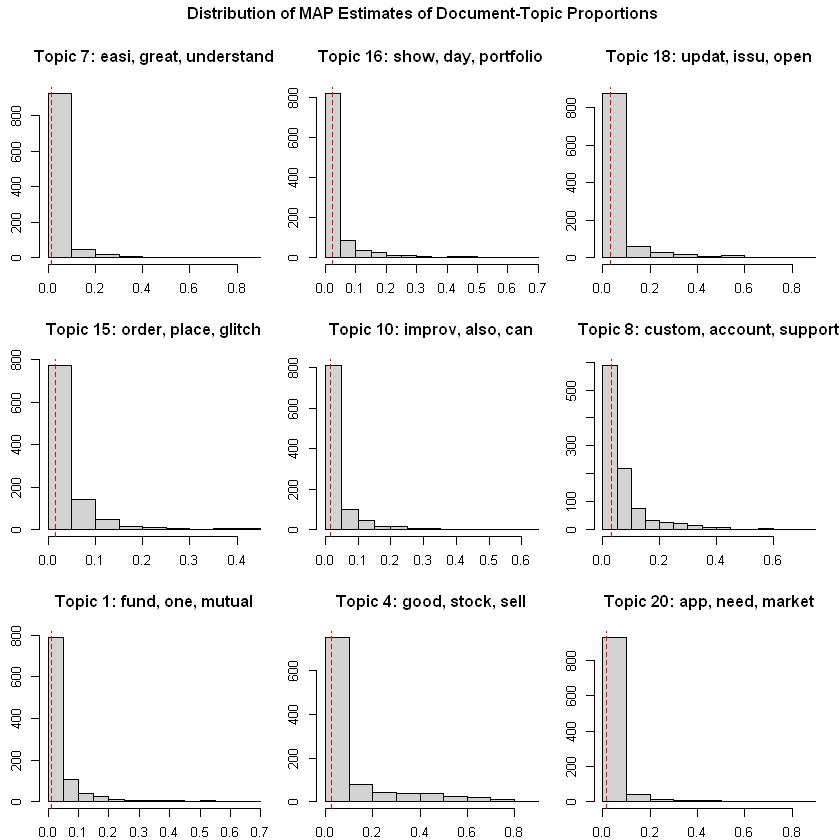

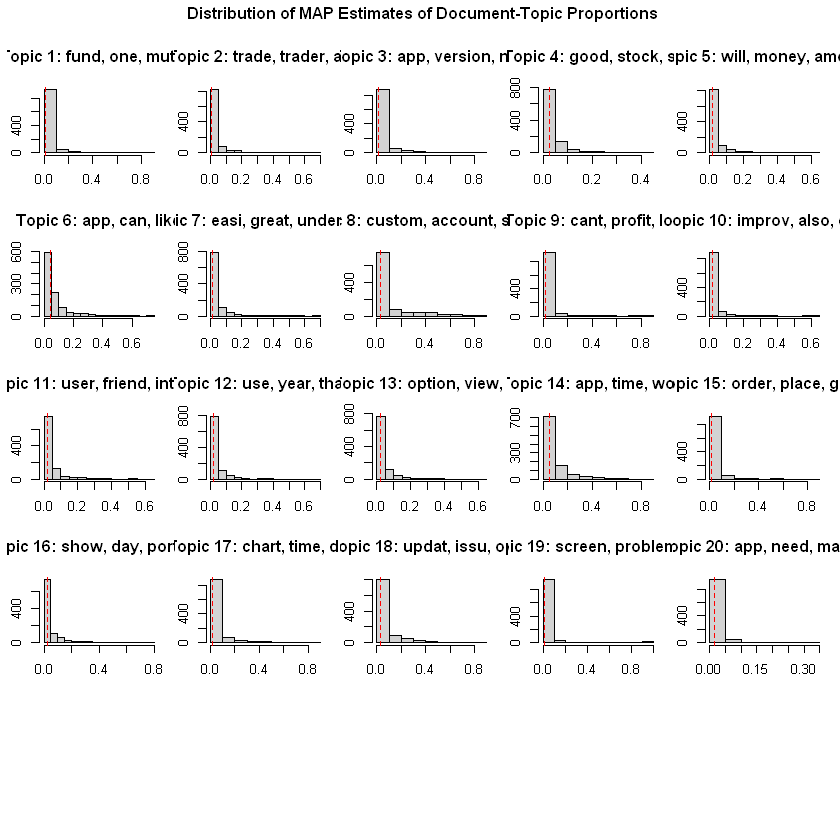

In [26]:
# Topic proportions

set.seed(837)
plot(Third_STM, type = "hist", topics = sample(1:20, size = 9))

# Plot histogram of topic proportions for all topics
plot(Third_STM, type = "hist")


 [1] -134.28244 -137.93302 -108.16590 -149.37540 -145.38692 -101.94127
 [7] -115.40904  -67.13445 -129.60589 -134.97568 -105.57249 -113.53785
[13] -131.82174  -90.56142 -118.76322 -119.09325 -107.58790 -102.52134
[19]  -90.33484 -142.25745
 [1] 9.807039 9.813514 9.743422 9.873921 9.774606 9.678052 9.700420 9.504369
 [9] 9.744494 9.748486 9.711179 9.644018 9.612307 9.536166 9.818578 9.564415
[17] 9.760054 9.445220 9.680525 9.886901


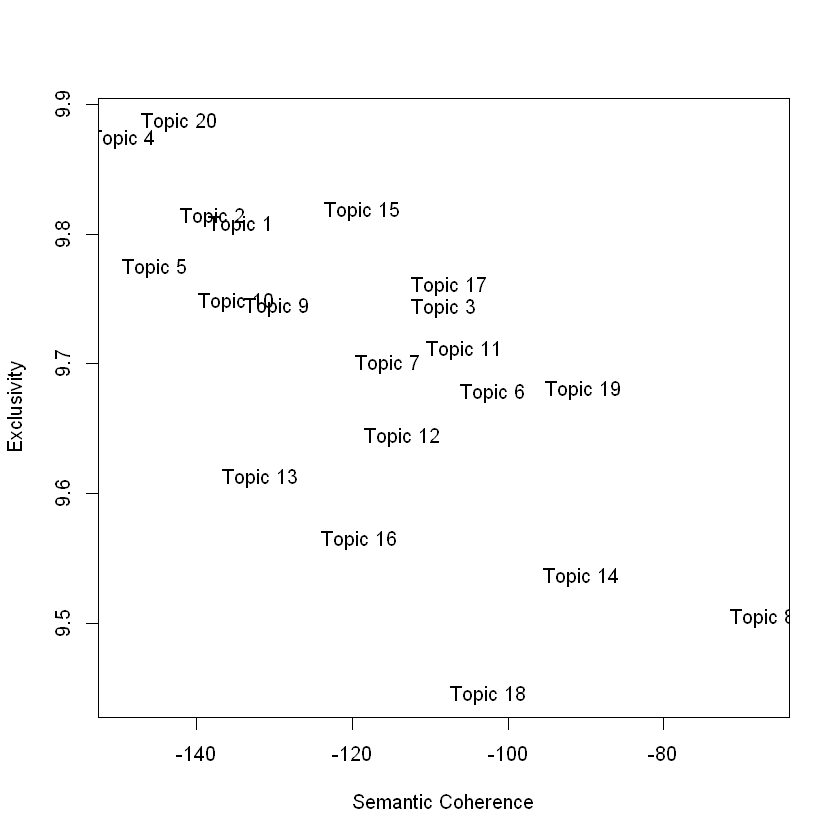

In [27]:
# The topicQuality() function plots these values 
# and labels each with its topic number:

# Assessing topic quality
topicQuality(model = Third_STM, documents = docs)
